In [128]:
# Setting up google drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')

Mounted at /content/gdrive


In [129]:
import my_utils as mu
import torch
from torch import nn
import patchify

# The Task

* Our goal for this week is to write some code to create an MLP and then experiment with several training options and hyper-parameters.

* For this reason we will use again the same pipeline we used last week! 
    
* The Learning Outcome: Hands-on application of PyTorch's API for creating and training MLPs for classification.

In [130]:
# Read training and test data
batch_size = 256
train_iter, test_iter = mu.load_data_fashion_mnist(batch_size)
# type(train_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [131]:
X,y = next(iter(train_iter))
print(X.shape)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 1, 28, 28])


In [153]:
patches = X.unfold(2, 7, 7).unfold(3, 7, 7)
#patches = patches.reshape(256, 1, -1, 7, 7)
patches.shape

torch.Size([256, 1, 4, 4, 7, 7])

In [158]:
patches2 = torch.squeeze(patches)
patches2[0]

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.2078],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5725, 0.9412],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.4039, 0.9608, 0.8627],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.7569, 0.8824, 0.8745],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.8118, 0.8706, 0.8706],
          [0.0000, 0.0000, 0.0000, 0.2588, 0.8745, 0.8549, 0.8784]],

         [[0.0000, 0.0588, 0.5725, 0.8588, 0.7725, 0.6902, 0.7255],
          [0.7255, 0.8980, 0.9373, 0.9020, 0.9529, 0.9804, 0.9843],
          [0.9333, 0.8863, 0.8824, 0.8980, 0.8863, 0.8588, 0.8627],
          [0.8549, 0.8824, 0.8863, 0.8706, 0.9020, 0.9020, 0.8980],
          [0.8745, 0.8667, 0.8627, 0.8824, 0.8824, 0.8824, 0.8902],
          [0.8706, 0.8667, 0.8784, 0.8824, 0.8784, 0.8784, 0.8745],
          [0.8667, 0.8745, 0.8863, 0.8824, 0.8824, 0.8824, 0.8824]],

         [[0.7373, 0.8471, 0.8980, 0.9529, 0

## Task 1


* The model below implements Softmax Regression. It has 1 Linear (or Fully-Connected Layer). Expand the `Net` class to have one more linear layer as follows: the 1st Linear layer will output `num_hidden` outputs. Set `num_hidden=10`.  Moreover, apply a `ReLU` activation function to the output of the 1st Linear layer. The second linear layer will have `num_hidden` inputs and 10 outputs (i.e. equal to the number of classes).



In [133]:
class Net(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        num_hidden = 10
        self.Linear1 = nn.Linear(num_inputs, num_hidden)
        self.relu = nn.ReLU()
        #self.sigmoid = nn.Sigmoid()
        self.Linear2 = nn.Linear(num_hidden, num_outputs)
        
    def forward(self, x):
        x = x.unfold(2, 7, 7).unfold(3, 7, 7)
        #x = x.reshape(256, 1, -1, 7, 7)
        hidden = self.Linear1(x)
        relu = self.relu(hidden)
        out = self.Linear2(relu)
        print(x)
        return out

In [134]:
# Model instantiation and initialisation 
def init_weights(m):
    if type(m) == nn.Linear: # by checking type we can init different layers in different ways
        torch.nn.init.normal_(m.weight, std=0.01)
        torch.nn.init.zeros_(m.bias)

In [135]:
# Create and initialize your model here:
num_inputs, num_hidden, num_outputs = 7, 4096, 10
net = Net(num_inputs, num_outputs)

# Initialise your model here using init_weights function. If not done, default initiliazation will be used.
net.apply(init_weights)

Net(
  (Linear1): Linear(in_features=7, out_features=10, bias=True)
  (relu): ReLU()
  (Linear2): Linear(in_features=10, out_features=10, bias=True)
)

# Loss and Optimization Algorithm
* As in Softmax Regression.

In [138]:
# Creare your loss here. Use Cross Entropy loss:
loss = nn.CrossEntropyLoss()
lr, wd = 0.01, 0.0
# Creare your optimizer here. Use SGD with weight decay wd and learning rate lr.
optimizer = torch.optim.Adam(net.parameters(),weight_decay=wd,lr=lr)

# Training

* Use `my_utils.train_ch3` as in Softmax Regression

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([[[[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

           [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0863, 0.5412],
            [0.0000, 0.0000, 0.0863,  ..., 0.0745, 0.2824, 0.6510],
            [0.0000, 0.0000, 0.0941,  ..., 0.0510, 0.0314, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0745,  ..., 0.1059, 0.0431, 0.1059],
            [0.0000, 0.0000, 0.0745,  ..., 0.0510, 0.0627, 0.0314],
            [0.0000, 0.0000, 0.0314,  ..., 0.0000, 0.0431, 0.0196]],

           [[0.3255, 0.0000, 0.0196,  ..., 0.0000, 0.0000, 0.0000],
            [0.5294, 0.1176, 0.1608,  ..., 0.0196, 0.0000, 0.0000],
          

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1, 4, 4, 7, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

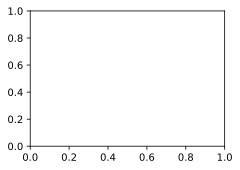

In [137]:
num_epochs = 60
mu.train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)

## Further Tasks

* Explore the following training options and observe their impact on the evolution of the **training loss**, the **training accuracy** and the **validation accuracy**. Different choices might have different impact on both accuracy and convergence:
    1. Change the number of hidden layers to 256
    1. Investigate different learning rates. Use 0.5, 0.9 and 0.01.
    1. Investigate adding weight decay wd=0.0005
    1. Investigate `Sigmoid` activation function. 
    1. Try different schemes for initializing the weights. 